# 9. Uczenie nienadzorowane

In [1]:
#imports
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import seaborn
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
%matplotlib inline

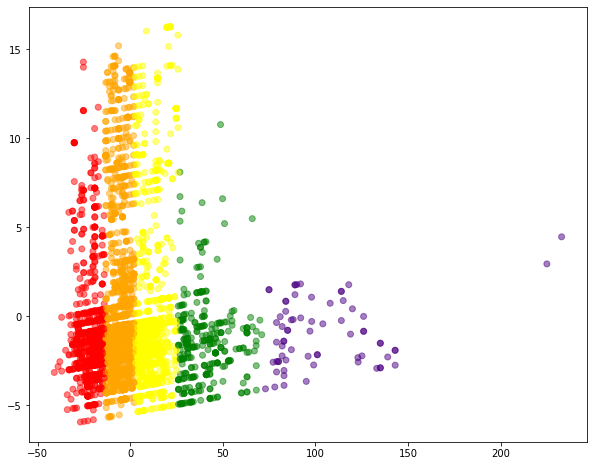

In [16]:
flats_data = pd.read_csv("flats_for_clustering.tsv", header=0, sep="\t")
flats = pd.DataFrame()

flats_data.dropna(axis=0, inplace=True)
flats_data["Piętro"] = flats_data["Piętro"].apply(lambda x: 0 if x == "parter" else x)
flats_data["Piętro"] = flats_data["Piętro"].apply(lambda x: 1 if x == "niski parter" else x)
flats_data["Piętro"] = flats_data["Piętro"].apply(lambda x: 10 if x == "poddasze" else x)
flats_data['Piętro'] = flats_data['Piętro'].astype(int)

xs = ['x1','x2','x3','x4']
attr = ["Powierzchnia w m2", "Liczba pokoi", "Liczba pięter w budynku", "Piętro"]
for x, y in zip(xs, attr):
    flats[x] = flats_data[y]

X = flats.values
Y = KMeans(n_clusters=5, random_state=0).fit_predict(flats, y=None, sample_weight=None)
pca = PCA(n_components=2)
pca_results = pca.fit_transform(flats)
colors_mapping = {0:'red', 1: 'yellow', 2: 'indigo', 3: 'orange', 4: 'green'}
label_color = [LABEL_COLOR_MAP[l] for l in Y]

plt.figure(figsize=(10,8))
plt.scatter(pca_result[:,0], pca_result[:,1], c=label_color, alpha=0.5)
plt.show()